# HOUSE PRICING

Pricing is one of the most searched areas in many industries, since it allows companies to get ahead of the game of sales. Concretely, finding out which are the house features that influence on the price of a house will give the key to predict the price of houses in the market.

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges to predict the final price of each home.

# Data cleaning

Let's start improting some libraries for EDA

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from scipy import stats # Correlation analysis
import scipy.stats as ss

import matplotlib.pyplot as plt
#%matplotlib inline

Upload training dataset and explore the data:

In [2]:
df_train = pd.read_csv("train.csv")
df_train.shape

(1460, 81)

Resize the maximum number of columns and rows that can be displayed to view all the columns:

In [3]:
pd.set_option('display.max_columns', 81)
pd.set_option('display.max_rows', 81)
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [4]:
# Describe numeric data
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [5]:
# Describe object data
df_train.describe(include='O').T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


## Missing values

A function was created to to calculate the percentage of the missing values in each attribute. If this value is higher than a certain threshold, the feature will be dropped from the dataset. There is also the option to fill in the rest of the missing values. If the value is a number, it will be filled with the mode of that feature, and if it is an object, it will use the category with the maximum frequency.

For certain datasets there is a considerable difference between using the mean and the mode to fill the nulls. If the data is skewed, the mean will impose a bias on the results, hence, it is best in that case to use the mode. For this particuar dataset we found there was not much of a difference, and that is the reason why the function was first designed to use the mean instead of the mode. This bit of code is still available as a comment.

In [6]:
def check_fill_nulls(dataset, thres, target, opt_fill=0):
    
    """
    This funtion checks the % of nulls for each feature in a given dataframe.
    It returns:
        - A table with a color gradient that is more intens according to the % of missing values.
        - A list of which are these dropped features.
        - A new dataframe that excludes those features from which more than a certain given % (thres) 
          of their values are missing.
    The new dataframe will exclude those rows where the target variable is nan, and will also fill in the 
    nulls values (numeric for mode, object for max frequency) if opt_fill=1.
    """
    
    # Create a table extracting the NaN values from the dataset
    missing_values = [nan for nan in dataset.columns if dataset[nan].isnull().mean() > 0]
    
    # Unite features and values and create dataframe from array
    nan_values = dataset[missing_values].isnull().mean()
    nan_values = pd.DataFrame(nan_values.reset_index())
    
    # Add column names
    nan_values.columns = ['Feature', 'Null%']
    
    # Show data types
    data_type = [df_train[i].dtype for i in nan_values['Feature']]
    nan_values['Data_type'] = data_type
    
    # Transform mean into a percentage
    nan_values['Null%'] = (nan_values['Null%']*100).round(decimals = 2)
    
    # Sort values and add a color gradient
    nan_values.sort_values('Null%', ascending=False, inplace=True)
    color = sns.light_palette("pink", as_cmap=True)
    colored_df = nan_values.style.background_gradient(cmap=color)
    
    # Collect columns which % of null values is higher than "thres"
    drop_cols = [row['Feature'] for i,row in nan_values.iterrows() if row['Null%'] > thres]
    
    # Drop collected features
    new_dataset = dataset.drop(columns=drop_cols)
    print("The following columns have been dropped:", drop_cols)
    
    # Drop rows that are nan on the target column:
    new_dataset.dropna(subset=[target], axis=0, inplace=True)
    new_dataset.reset_index(drop=True, inplace=True)
    
    # Filling the nulls
    # We will substitute them with the mode of the feature in the case of numerical values,
    # and with the frecuency for the object ones.
    if opt_fill == 1:
        
        # Collect columns which % of null values is equal or lower than "thres"
        fill_cols = [row['Feature'] for i,row in nan_values.iterrows() if row['Null%'] <= thres]

        # Create dataframe and merge to obtain their data types
        df_fill_cols = pd.DataFrame()
        df_fill_cols['Feature'] = fill_cols
        df_fill_cols = df_fill_cols.merge(nan_values).drop(columns='Null%')
        
        for i,row in df_fill_cols.iterrows():
        #print(row)
            feature = row['Feature']
            if row['Data_type'] == 'object':
                #print('object')
                freq_max = new_dataset[feature].value_counts().idxmax()
                new_dataset[feature].replace(np.nan, freq_max, inplace=True)
            else:
                #print('number')
                #avg_val = new_dataset[feature].astype("float").mean(axis=0)
                #new_dataset[feature].replace(np.nan, avg_val, inplace=True)
                mode_val = new_dataset[feature].mode()[0]
                new_dataset[feature].replace(np.nan, mode_val, inplace=True)    
    
    return colored_df, drop_cols, new_dataset

In [7]:
ranking, dropped_cols, train = check_fill_nulls(df_train, thres=50, target='SalePrice', opt_fill=1)

The following columns have been dropped: ['PoolQC', 'MiscFeature', 'Alley', 'Fence']


Looking at the dataset description file, we notice that these dropped features are probably missing all this values because they do not have that feature - NA (e.g., PoolQC might be null because the house doesn't actually have a pool).

Another approach would be to look for all the features that could be NA instead of null and replace these values. For this first attempt with the dataset, we will move on with these features dropped to have a quicker overview.

In [8]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Gd,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [9]:
ranking

,Feature,Null%,Data_type
16,PoolQC,99.520000,object
18,MiscFeature,96.300000,object
1,Alley,93.770000,object
17,Fence,80.750000,object
10,FireplaceQu,47.260000,object
0,LotFrontage,17.740000,float64
11,GarageType,5.550000,object
12,GarageYrBlt,5.550000,float64
13,GarageFinish,5.550000,object
14,GarageQual,5.550000,object


## Correlation

Let's explore now the correlation between the features:

The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

- 1: Perfect positive linear correlation.
- 0: No linear correlation, the two variables most likely do not affect each other.
- -1: Perfect negative linear correlation.

In [10]:
train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.012497,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,-0.003243,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.349116,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.098664,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.012497,-0.349116,1.000000,0.281283,0.236891,-0.056461,0.107427,0.087325,0.174146,0.199171,0.034498,0.138852,0.359606,0.404099,0.070626,0.042211,0.359866,0.079531,-0.011613,0.179058,0.037839,0.232143,0.002760,0.319389,0.208721,0.040960,0.264353,0.317925,0.061329,0.131468,0.014349,0.057826,0.036907,0.177999,-0.012274,0.012785,0.003021,0.329220
LotArea,-0.033226,-0.139781,0.281283,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.042198,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.236891,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.437998,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.056461,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.299203,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.107427,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.700098,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.087325,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.571369,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.174146,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.209289,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.199171,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.119267,0.224054,0.296970,0.204306,0.111761,-0.102303,0.02645

The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention:

- p-value  <  0.001: strong evidence that the correlation is significant
- p-value  <  0.05: moderate evidence that the correlation is significant
- p-value  <  0.1: weak evidence that the correlation is significant
- p-value  >  0.1: no evidence that the correlation is significant

In [11]:
def get_num_obj(dataset):
    
    """
    This function takes a dataset and returns two dataframes from it: one with numerical data and another with object data.
    """
    
    # Get data types:
    data_type = [dataset[i].dtype for i in dataset.columns]

    # Create dataframe with features and their types
    df_dtypes = pd.DataFrame()
    df_dtypes['Feature'] = dataset.columns
    df_dtypes['Data_type'] = data_type

    # Create two different dataframes into numerical and object
    df_num = df_dtypes.loc[(df_dtypes['Data_type'] != 'object')]
    df_obj = df_dtypes.loc[(df_dtypes['Data_type'] == 'object')]
    
    return df_num, df_obj

In [12]:
train_num, train_obj = get_num_obj(train)

### Numerical features
Let's start with numerical values:

Another function was created for this. It takes in a list of numerical features, a dataset, and its target name and calculates the Pearson Correlation Coefficient and the p values. It will return a dataframe with these values and a list of features that have a Pearson Correlation higher than 0.5 and a p value lower than 0.001.

In [13]:
def get_corr_features(num_features, dataset, target):
    
    """
    This function calculates the Pearson Correlation Coefficient and the p value of certain numerical features (num_features)
    of a dataset with a specific target. It creates a dataframe with these values and returns it.
    It also returns a list of features that have a Pearson Correlation higher than 0.5 and a p value lower than 0.001,
    ordered by "priority".
    """
    
    features = []
    df_Pcorr = []
    df_Pval = []
    # loop over numerical features to get these stats:
    for i,row in num_features.iterrows():
        feature = row['Feature']
        pearson_coef, p_value = stats.pearsonr(dataset[feature], dataset[target])
        features.append(feature)
        df_Pcorr.append(pearson_coef)
        df_Pval.append(p_value)
    
    # Create dataframe from arrays
    df_corr = pd.DataFrame(features)
    # Add column names
    df_corr.columns = ['Feature']
    # Add other columns
    df_corr['PearsonCorr'] = df_Pcorr
    df_corr['Pvalue'] = df_Pval

    # Drop the target row and sort values
    df_corr.drop(df_corr.loc[df_corr['Feature']==target].index, inplace=True)
    df_corr.sort_values('Pvalue', ascending=True, inplace=True)
    
    # List of features that have a Pearson Correlation higher than 0.5 and a p value lower than 0.001,  ordered by "priority"
    interest_feature = [row['Feature'] for i,row in df_corr.iterrows() if abs(row['PearsonCorr']) > 0.5 and row['Pvalue']<0.001]
    
    print('Features with a Pearson correlation > 0.5 and p value < 0.001:', interest_feature)
    
    return df_corr, interest_feature

In [14]:
train_corr_num, corr_features_num = get_corr_features(train_num, train, target='SalePrice')

Features with a Pearson correlation > 0.5 and p value < 0.001: ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']


In [15]:
train_corr_num

,Feature,PearsonCorr,Pvalue
4,OverallQual,0.790982,2.185675e-313
16,GrLivArea,0.708624,4.518034e-223
26,GarageCars,0.640409,2.498644e-169
27,GarageArea,0.623431,5.265038e-158
12,TotalBsmtSF,0.613581,9.484229e-152
13,1stFlrSF,0.605852,5.394711e-147
19,FullBath,0.560664,1.236470e-121
23,TotRmsAbvGrd,0.533723,2.772281e-108
6,YearBuilt,0.522897,2.990229e-103
7,YearRemodAdd,0.507101,3.164948e-96


### Object features
It's the turn of object features:

We will get the indicator variables so we can use categorical variables for regression analysis in the later modules.

An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.

As we can see, features that have the majority of it's results in one outcome, are not usefull to discern patterns. For example, "Street" has 1454 results for "Pave" and 6 results for Grvl, and "Utilities", has 1459 results for "AllPub" and 1 for NoSeWa.

To start at some point, we can filter out those features whose most frequent outcome has more than 75% of the results:

In [16]:
train_descr = train.describe(include='O').T
obj_consider = [i for i,row in train_descr.iterrows() if row['freq'] < train.shape[0]*0.75]

In [17]:
df_train_obj = train.copy()

all_features_corr = train.describe(include='all').T
all_features = [i for i, row in all_features_corr.iterrows()]

for feature in all_features:

    if feature in obj_consider:
    # get dummies
        dummy_var = pd.get_dummies(train[feature])

        for column in dummy_var:
            # Rename variable
            dummy_var.rename(columns={dummy_var[column].name:feature+'-'+dummy_var[column].name}, inplace=True)
    
        # Concat dataset with dummy 
        df_train_obj = pd.concat([df_train_obj, dummy_var], axis=1)
        
    # drop original column from dataset
    df_train_obj.drop(feature, axis = 1, inplace=True)
    
df_train_obj

,LotShape-IR1,LotShape-IR2,LotShape-IR3,LotShape-Reg,LotConfig-Corner,LotConfig-CulDSac,LotConfig-FR2,LotConfig-FR3,LotConfig-Inside,Neighborhood-Blmngtn,Neighborhood-Blueste,Neighborhood-BrDale,Neighborhood-BrkSide,Neighborhood-ClearCr,Neighborhood-CollgCr,Neighborhood-Crawfor,Neighborhood-Edwards,Neighborhood-Gilbert,Neighborhood-IDOTRR,Neighborhood-MeadowV,Neighborhood-Mitchel,Neighborhood-NAmes,Neighborhood-NPkVill,Neighborhood-NWAmes,Neighborhood-NoRidge,Neighborhood-NridgHt,Neighborhood-OldTown,Neighborhood-SWISU,Neighborhood-Sawyer,Neighborhood-SawyerW,Neighborhood-Somerst,Neighborhood-StoneBr,Neighborhood-Timber,Neighborhood-Veenker,HouseStyle-1.5Fin,HouseStyle-1.5Unf,HouseStyle-1Story,HouseStyle-2.5Fin,HouseStyle-2.5Unf,HouseStyle-2Story,...,Foundation-Slab,Foundation-Stone,Foundation-Wood,BsmtQual-Ex,BsmtQual-Fa,BsmtQual-Gd,BsmtQual-TA,BsmtExposure-Av,BsmtExposure-Gd,BsmtExposure-Mn,BsmtExposure-No,BsmtFinType1-ALQ,BsmtFinType1-BLQ,BsmtFinType1-GLQ,BsmtFinType1-LwQ,BsmtFinType1-Rec,BsmtFinType1-Unf,HeatingQC-Ex,HeatingQC-Fa,HeatingQC-Gd,HeatingQC-Po,HeatingQC-TA,KitchenQual-Ex,KitchenQual-Fa,KitchenQual-Gd,KitchenQual-TA,FireplaceQu-Ex,FireplaceQu-Fa,FireplaceQu-Gd,FireplaceQu-Po,FireplaceQu-TA,GarageType-2Types,GarageType-Attchd,GarageType-Basment,GarageType-BuiltIn,GarageType-CarPort,GarageType-Detchd,GarageFinish-Fin,GarageFinish-RFn,GarageFinish-Unf
0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0
1456,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1
1457,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1458,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1


Trying to obtain the Pearson correlation with one-hot encoding for each feature could end up with a matrix that is too complex to extract eny information from it.

We’re looking for a measure of association between the mix of categorical and numerical variables, hence the Correlation Ratio would be much more appropriate for our endeavour.

The Correlation Ratio is defined as the weighted variance of the mean of each category divided by the variance of all samples; it answers the following question: Given a continuous number, how well can you know to which category it belongs to? The output is too on the range of [0,1].

In [18]:
def correlation_ratio(categories, measurements):
    """
    Fuction extracted from https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
    """
    
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
        
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
        
    return eta

In [19]:
corr_ratio = []
features = []

for i,row in train_obj.iterrows():
    feature_obj = row['Feature']
    category = train[feature_obj]
    measure = train['SalePrice']
    eta = correlation_ratio(category, measure)
    
    features.append(feature_obj)
    corr_ratio.append(eta)
    
# Create dataframe from arrays
df_corr_ratio = pd.DataFrame(features)
# Add column names
df_corr_ratio.columns = ['Feature']
# Add other columns
df_corr_ratio['Correlation_Ratio'] = corr_ratio
df_corr_ratio.sort_values('Correlation_Ratio', ascending=False, inplace=True)
df_corr_ratio

,Feature,Correlation_Ratio
7,Neighborhood,0.738630
17,ExterQual,0.690933
20,BsmtQual,0.678460
29,KitchenQual,0.675721
33,GarageFinish,0.542375
19,Foundation,0.506328
26,HeatingQC,0.442154
23,BsmtFinType1,0.441780
16,MasVnrType,0.428108
32,GarageType,0.411596


We will keep the features that have a correlation ratio higher than 0.5:

In [20]:
corr_features_obj = [row['Feature'] for i,row in df_corr_ratio.iterrows() if row['Correlation_Ratio'] > 0.5]
corr_features_obj

['Neighborhood',
 'ExterQual',
 'BsmtQual',
 'KitchenQual',
 'GarageFinish',
 'Foundation']

This is hence the list of attributes we will concentrate on for the following analysis:

In [21]:
corr_features = corr_features_num + corr_features_obj
corr_features

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'Neighborhood',
 'ExterQual',
 'BsmtQual',
 'KitchenQual',
 'GarageFinish',
 'Foundation']

In [36]:
print("~"*127*2)
print("                                                 Code in construction!")
print("~"*127*2)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                                 Code in construction!
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


# Exploratory Data Analysis

We can start the EDA plotting the selected numerical features against the target variable:

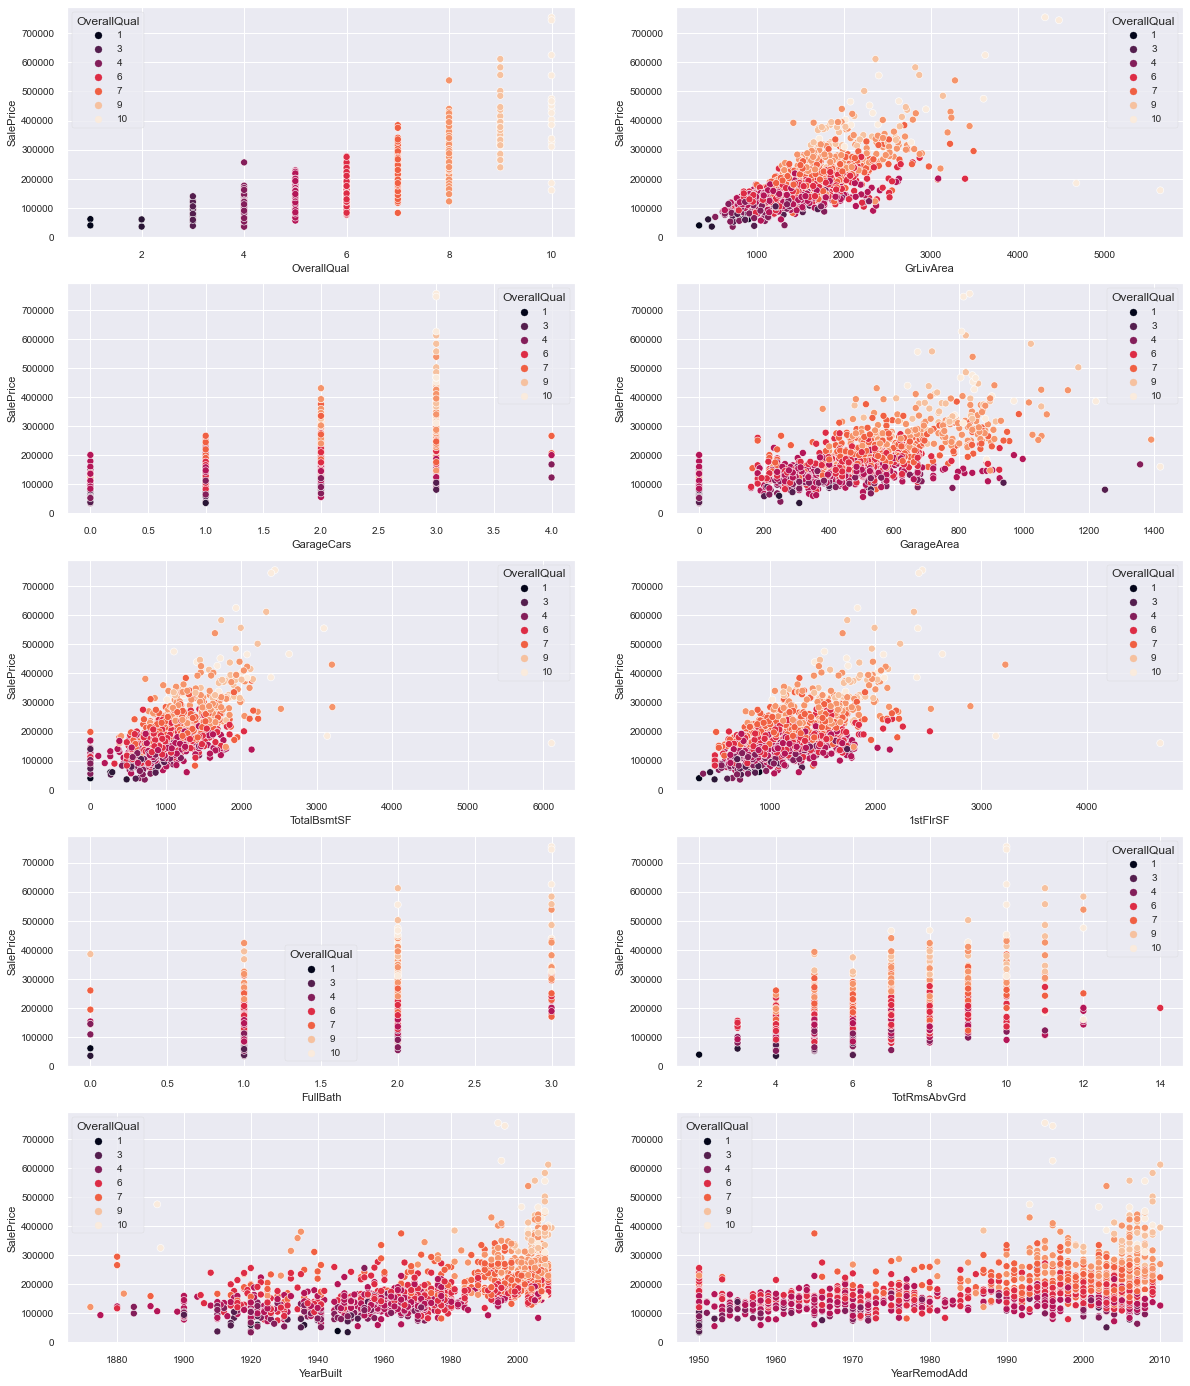

In [31]:
sns.set_theme()
plt.style.use(plt.style.available[19])
i = 1
plt.figure(figsize=(20,50))
#plt.legend(ncols=10)
#fig, ax = plt.subplots()
for feature in corr_features_num:
    plt.subplot(10, 2, i)
    sns.scatterplot(x=feature, data=train, y=train['SalePrice'], hue='OverallQual', palette='rocket')
    plt.xlabel(feature)
    i += 1
plt.show()

(0.0, 892548.0876391075)

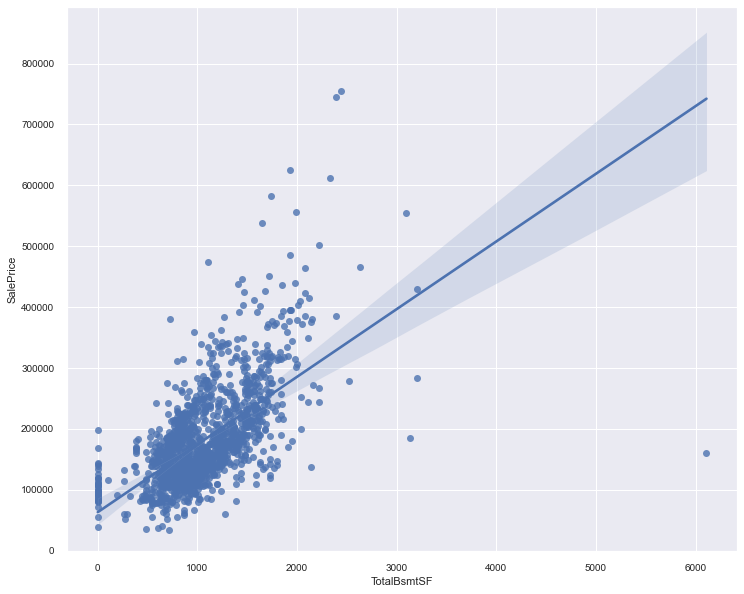

In [32]:
plt.figure(figsize=(12, 10))
sns.regplot(x="TotalBsmtSF", y="SalePrice", data=train)
plt.ylim(0,)